I. DATA PREPOCESSING

CHANGER LES DONNEES, IDENTIFIER LES DONNEES MANQUANTES

In [834]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

print(train.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Age: 177 valeurs manquantes

Cabin: 687 valeurs manquantes

Embarked: 2 valeurs manquantes

LISTER LES DONNEES ET LES VALEURS ATTENDUES - AFFICHER LES DATA TYPES

In [835]:
train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Les valeurs attendues pour les colonnes:

 4   Sex          object --- > Valeurs 0,1 à la place de 'male' et 'female'  
 11  Embarked     object --- > Valeurs 0,1,2 à la place de 'C','S','Q'

 Il faut remplacer les valeurs manquantes pour 'Age','Cabin','Embarked'

IDENTIFIER LES VALEURS ABERRANTES

In [836]:
train.describe()
#Ces infos sont utiles pour repérer des valeurs très éloignées du reste (des extrêmes)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


['male' 'female']
True
True
['S' 'C' 'Q' nan]
True


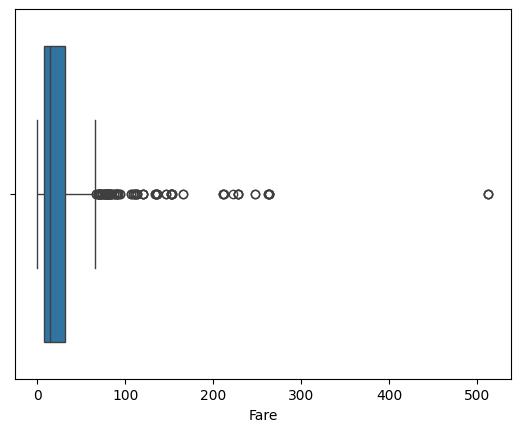

In [837]:
#autres méthodes simples d'analyse:

print(train['Sex'].unique())
print(train["Sex"].apply(lambda x: isinstance(x, str)).all())

print(train["Name"].apply(lambda x: isinstance(x, str)).all())

print(train['Embarked'].unique())

print(train["Fare"].apply(lambda x: isinstance(x, float)).all())
sns.boxplot(x=train['Fare'])
plt.show()


CHOISIR LES METHODES DE TRAITEMENT POUR LES DONNEES ABERRANTS

Identifier les colonnes avec valeurs manquantes

Remplacer la valeur 'Age' par la mediane 

Remplacer les valeurs catégorielles (ex : Embarked) par la valeur la plus fréquente (mode)

Remplacer les NaN d’une colonne par une valeur fixe (Cabin)

In [838]:

train['Age'] = train['Age'].fillna(train['Age'].median())
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])
train['Cabin'] = train['Cabin'].fillna('Inconnu')

train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Inconnu,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Inconnu,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Inconnu,S


IDENTIFIER LES DOUBLONS

In [839]:
train[train.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


Il n'y a pas de doublon dans les données.

REGARDER LES TYPES DE DONNEES: CONVERTIR SI BESOIN EN VALEUR NUMERIQUE SI LE TYPE EST OBJECT POUR DES COLONNES DE NOMBRE

In [840]:
train_original = train.copy()

from sklearn.preprocessing import LabelEncoder

train["Sex"] = train["Sex"].map({"male": 1, "female": 0})
train["Embarked"] = train["Embarked"].map({"S": 0, "C": 1, "Q": 2})

'''
le = LabelEncoder()

train["Sex"] = le.fit_transform(train["Sex"])
train["Embarked"] = le.fit_transform(train["Embarked"])
or
pd.get_dummies(train["Embarked"]) (but it creates columns)
'''

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,Inconnu,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,Inconnu,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,Inconnu,0


II. FEATURES

ANALYSE DE DONNEES

-Taux de survie pour tous les passagers

In [841]:
taux_survie = train['Survived'].mean()

print(f"Taux de survie pour tous les passagers : {taux_survie:.3f} ({taux_survie*100:.1f} %)")


Taux de survie pour tous les passagers : 0.384 (38.4 %)


In [842]:
sex_counts = train['Sex'].value_counts()
print(sex_counts)

Sex
1    577
0    314
Name: count, dtype: int64


FEMMES / HOMMES

-Répartition femmes / hommes dans le total des passagers

-Répartition femmes / hommes parmi les survécus

-Taux de survie entre les sexes


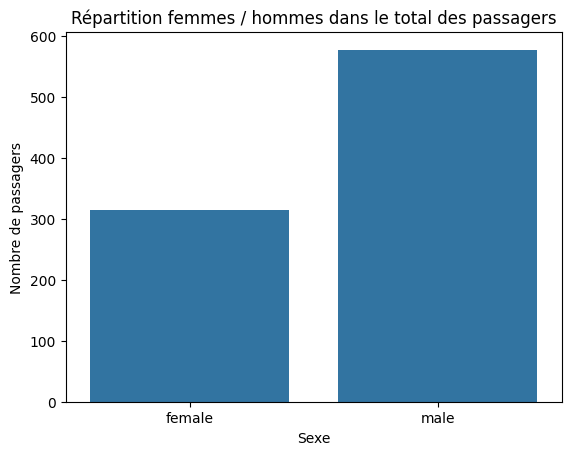

Sex
0    233
1    109
Name: count, dtype: int64


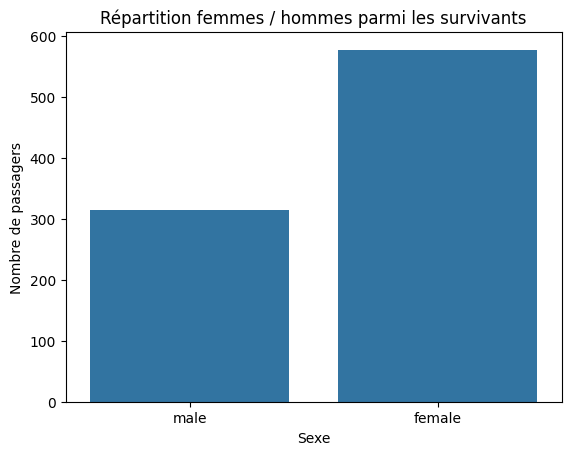

Sex
0    0.742038
1    0.188908
Name: Survived, dtype: float64


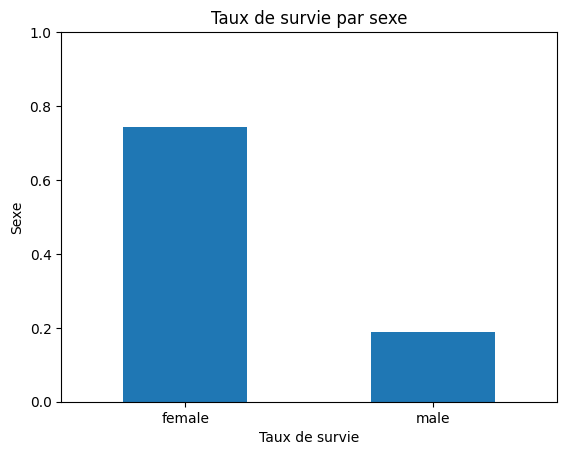

In [843]:
sns.countplot(x='Sex', data=train)
plt.title("Répartition femmes / hommes dans le total des passagers")
plt.xlabel("Sexe")
plt.ylabel("Nombre de passagers")
plt.xticks(ticks=[0,1], labels=['female', 'male'])
plt.show()

survived_by_sex = train[train['Survived'] == 1]['Sex'].value_counts()
print(survived_by_sex)

sns.countplot(x='Sex', data=train)
plt.title("Répartition femmes / hommes parmi les survivants")
plt.xlabel("Sexe")
plt.ylabel("Nombre de passagers")
plt.xticks(ticks=[0,1], labels=['male', 'female'])
plt.show()

survival_rate_by_sex = train.groupby('Sex')['Survived'].mean()
print(survival_rate_by_sex)

survival_rate_by_sex.plot(kind='bar')
plt.title("Taux de survie par sexe")
plt.xlabel("Taux de survie")
plt.ylabel("Sexe")
plt.xticks(rotation=0)
plt.ylim(0,1)
plt.xticks(ticks=[0,1], labels=['female', 'male'])
plt.show()


CLASSE DE BILLET:

-Répartition hommes/femmes selon les classes (Pclass) dans le total des passagers

-Répartition femme/homme parmi les survivants selon les classes

-Survie selon les catégories de prix de billet

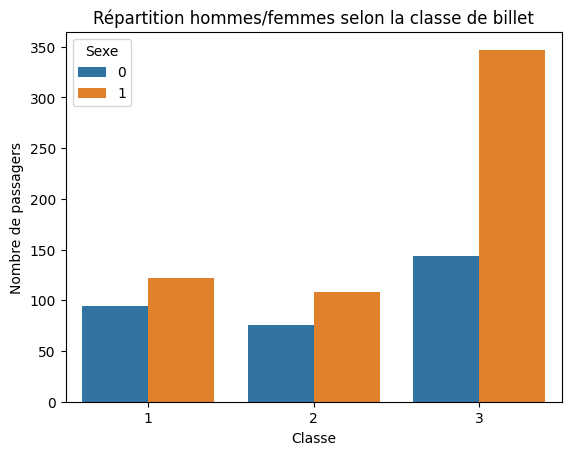

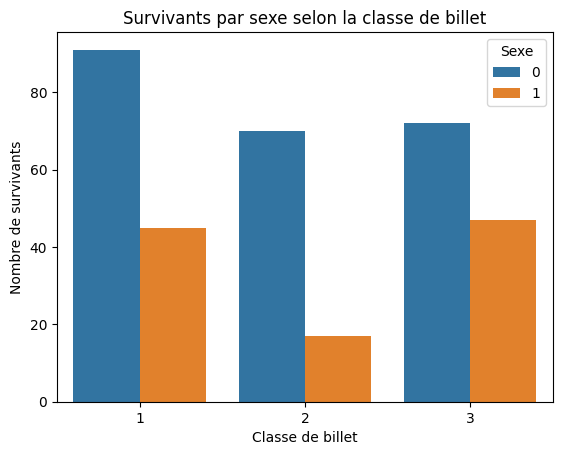

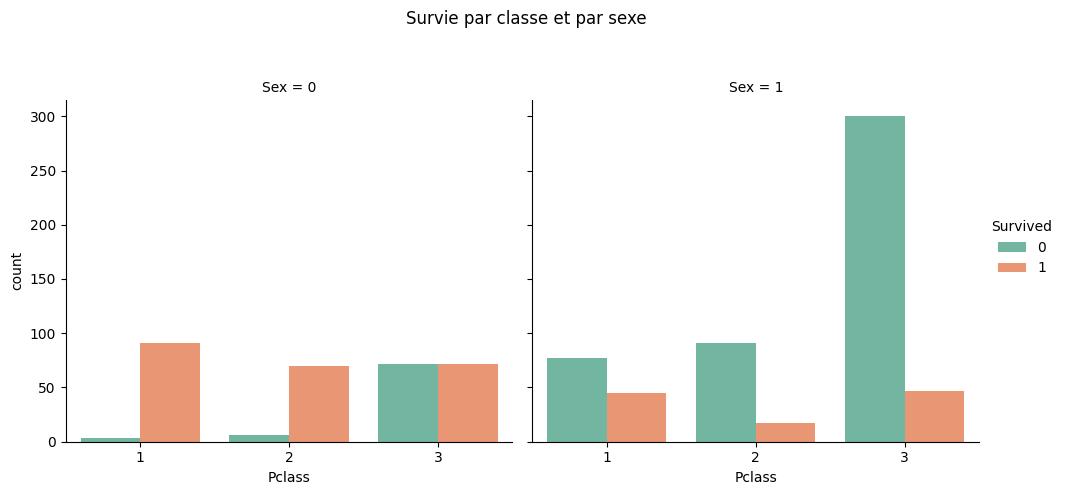

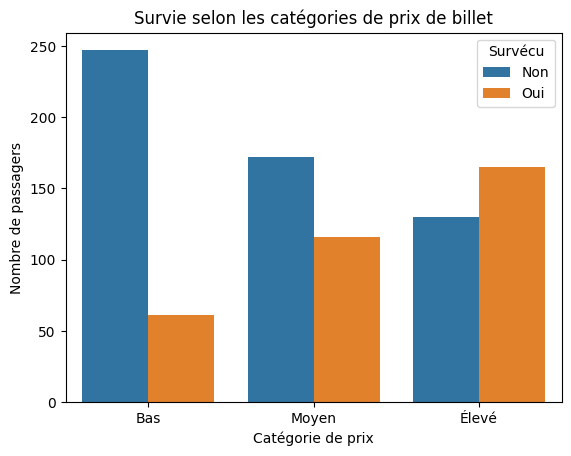

In [844]:
sns.countplot(data=train, x='Pclass', hue='Sex')
plt.title("Répartition hommes/femmes selon la classe de billet")
plt.xlabel("Classe")
plt.ylabel("Nombre de passagers")
plt.legend(title="Sexe")

plt.show()

sns.countplot(data=train[train['Survived'] == 1], x='Pclass', hue='Sex')
plt.title("Survivants par sexe selon la classe de billet")
plt.xlabel("Classe de billet")
plt.ylabel("Nombre de survivants")
plt.legend(title="Sexe")
plt.show()

#Overview 2.
sns.catplot(x="Pclass", hue="Survived", palette='Set2', col="Sex", data=train, kind="count")
plt.subplots_adjust(top=0.8)
plt.suptitle("Survie par classe et par sexe")
plt.show()

sns.countplot(x=pd.qcut(train["Fare"], q=3, labels=["Bas", "Moyen", "Élevé"]),hue="Survived",data=train)
plt.title("Survie selon les catégories de prix de billet")
plt.xlabel("Catégorie de prix")
plt.ylabel("Nombre de passagers")
plt.legend(title="Survécu", labels=["Non", "Oui"])
plt.show()

L'AGE:

-Repartition des âges dans le total des passagers

-l'age le plus frèquente entre tous les voyageurs / entre les survécus

-Répartition selon l'age femmes / hommes dans le total des passagers

-Répartition selon l'age femmes / hommes parmi les survivants

-Répartition selon l'age et selon classe de billet femmes / hommes dans le total des passagers

-Répartition selon l'age et selon classe de billet femmes / hommes parmi les survivants

-dans l'age, quantité les enfants (>16) dans les données/survécu

-repartition age entre femme homme entre total des pasagers et entre passagers survécus entre l'age 0-3 ans


0


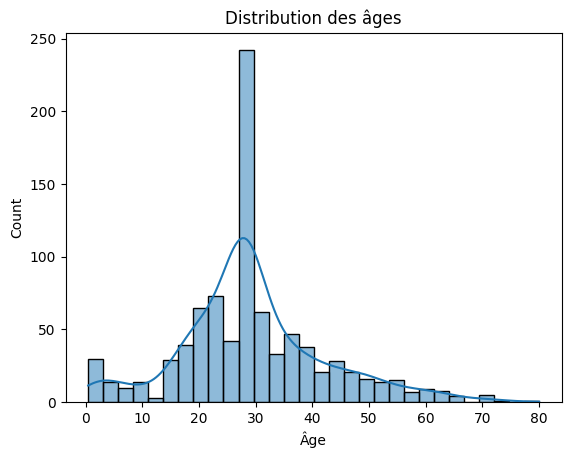

Âge le plus fréquent parmi tous les passagers : 28.0
Âge le plus fréquent parmi les survivants : 28.0


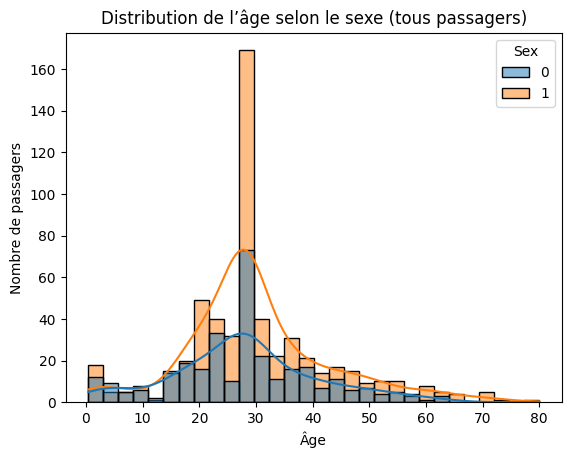

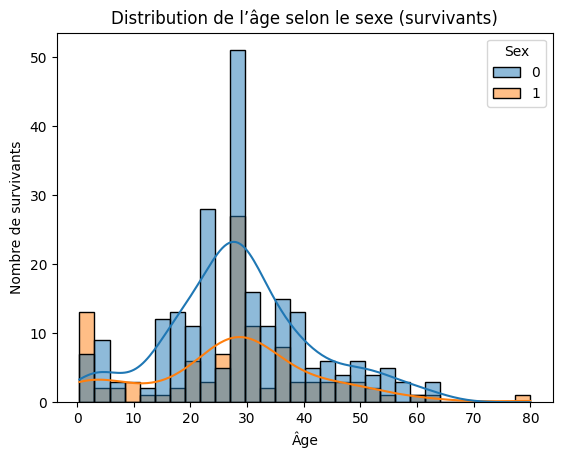

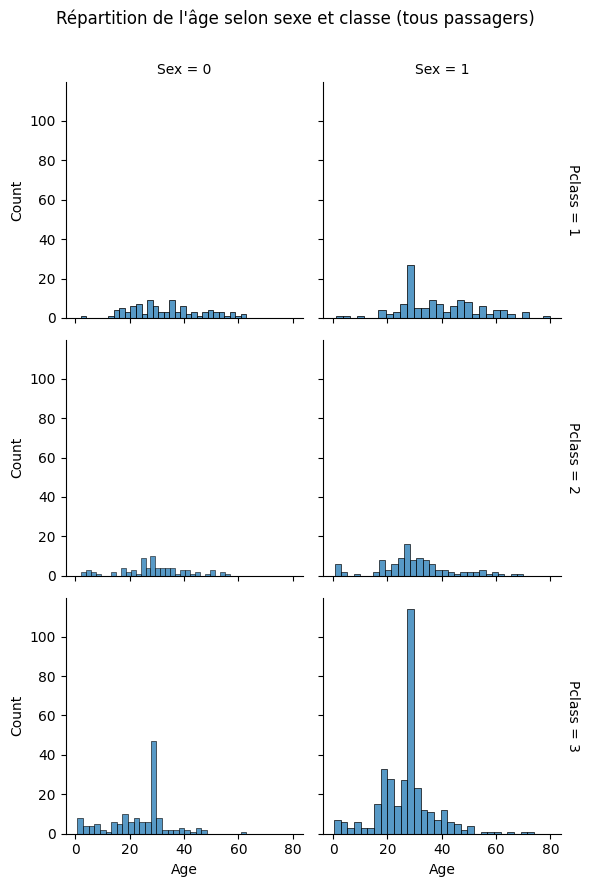

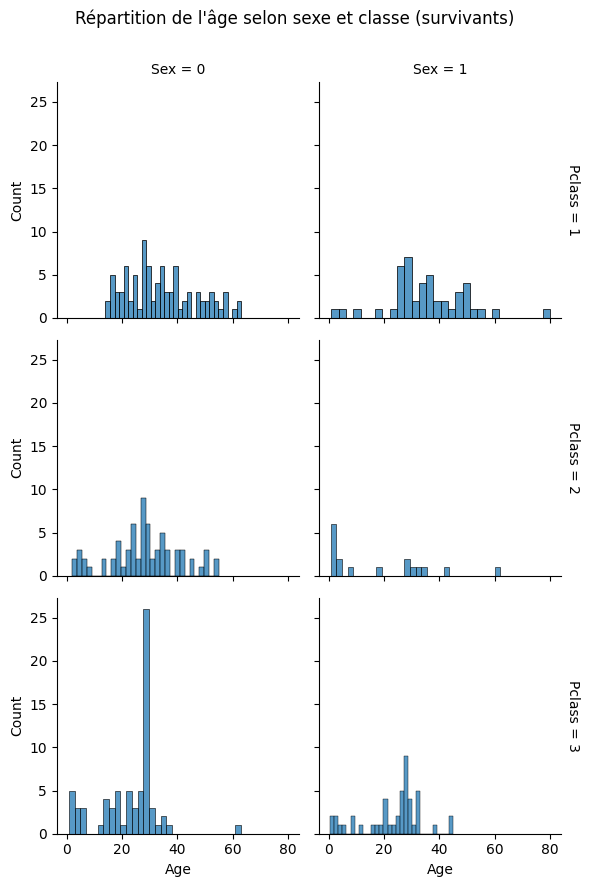

Enfants (<=16 ans) dans le jeu de données : 100
Enfants (<=16 ans) ayant survécu : 55


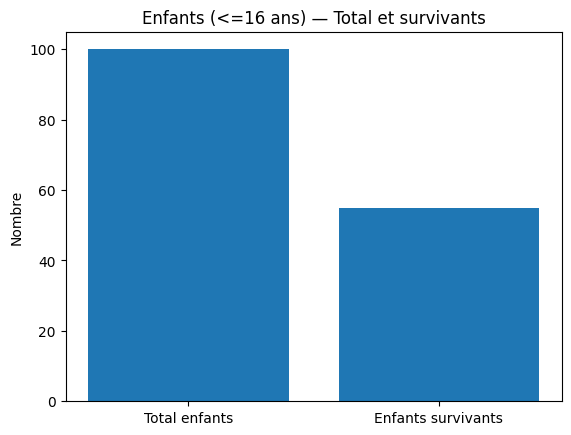

Enfants (<=3 ans) dans le jeu de données : 30
Enfants (<=3 ans) ayant survécu : 20


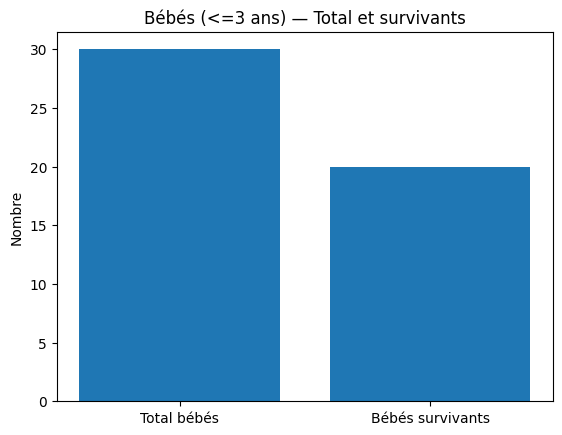

In [845]:
print(train['Age'].isnull().sum())


sns.histplot(train['Age'], bins=30, kde=True)
plt.title("Distribution des âges")
plt.xlabel("Âge")
plt.show()

print(f"Âge le plus fréquent parmi tous les passagers : {train['Age'].mode().values[0]}")

print(f"Âge le plus fréquent parmi les survivants : {train[train['Survived']==1]['Age'].mode().values[0]}")

sns.histplot(data=train, x="Age", hue="Sex", bins=30, kde=True)
plt.title("Distribution de l’âge selon le sexe (tous passagers)")
plt.xlabel("Âge")
plt.ylabel("Nombre de passagers")
plt.show()

sns.histplot(data=train[train['Survived'] == 1], x="Age", hue="Sex", bins=30, kde=True)
plt.title("Distribution de l’âge selon le sexe (survivants)")
plt.xlabel("Âge")
plt.ylabel("Nombre de survivants")
plt.show()



g = sns.FacetGrid(train, row='Pclass', col='Sex', margin_titles=True, height=3)
g.map(sns.histplot, "Age", bins=30)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Répartition de l\'âge selon sexe et classe (tous passagers)')
plt.show()

g = sns.FacetGrid(train[train['Survived'] == 1], row='Pclass', col='Sex', margin_titles=True, height=3)
g.map(sns.histplot, "Age", bins=30)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Répartition de l'âge selon sexe et classe (survivants)")
plt.show()



enfants = train[train['Age'] <= 16]
nb_enfants_total = enfants['Age'].count()
nb_enfants_surv = enfants[enfants['Survived'] == 1]['Age'].count()

print("Enfants (<=16 ans) dans le jeu de données :", nb_enfants_total)
print("Enfants (<=16 ans) ayant survécu :", nb_enfants_surv)

plt.bar(['Total enfants', 'Enfants survivants'], [nb_enfants_total, nb_enfants_surv])
plt.ylabel("Nombre")
plt.title("Enfants (<=16 ans) — Total et survivants")
plt.show()



enfants_0_3 = train[(train['Age'] >= 0) & (train['Age'] <= 3)]
nb_enfants_0_3_total = enfants_0_3['Age'].count()
nb_enfants_0_3_surv = enfants_0_3[enfants_0_3['Survived'] == 1]['Age'].count()

print("Enfants (<=3 ans) dans le jeu de données :", nb_enfants_0_3_total)
print("Enfants (<=3 ans) ayant survécu :", nb_enfants_0_3_surv)

plt.bar(['Total bébés', 'Bébés survivants'], [nb_enfants_0_3_total, nb_enfants_0_3_surv])
plt.ylabel("Nombre")
plt.title("Bébés (<=3 ans) — Total et survivants")
plt.show()


RELATIONS FAMILIALES

-Repartition selon sibsp: selon nombre des sibsp dans le total des passagers

-Repartition selon sibsp: selon nombre des sibsp parmi les survécus

-Repartition selon parch: selon nombre des parch dans le total des passagers

-Repartition selon parch: selon nombre des parch parmi les survécus

-Repartition selon sibsp: selon nombre des sibsp parmi les survécus et sexe

-Repartition selon parch: selon nombre des parch parmi les survécus et sexe

-taux de survie par nombre de Parch (tous les passagers)

-taux de survie par nombre de Parch (tous les passagers)

-Proportion (%) de survivants par Parch

-Proportion (%) de survivants par SibSp

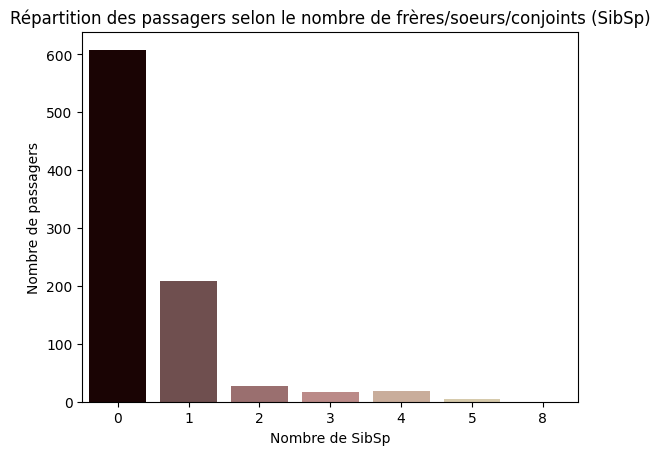

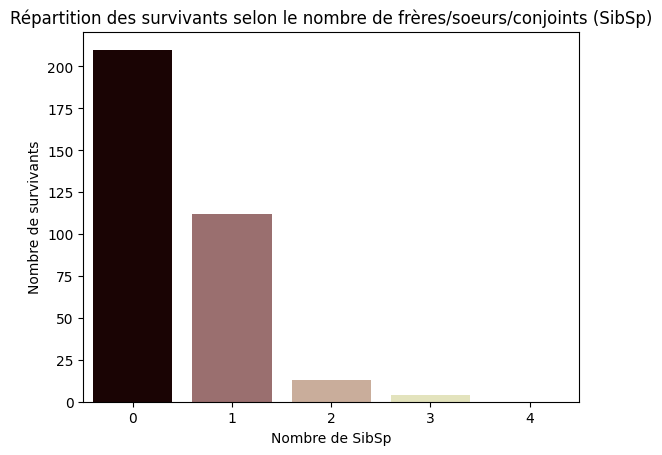

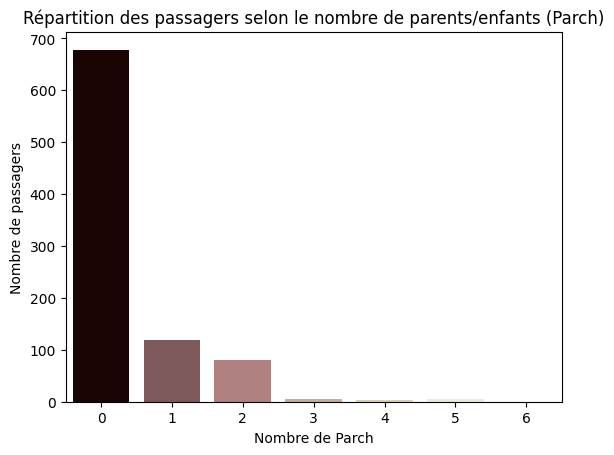

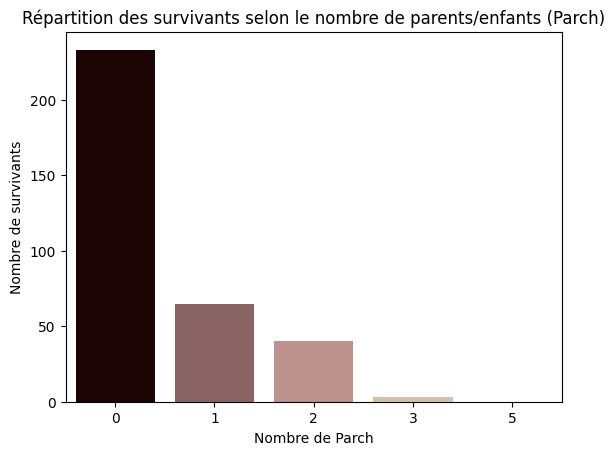

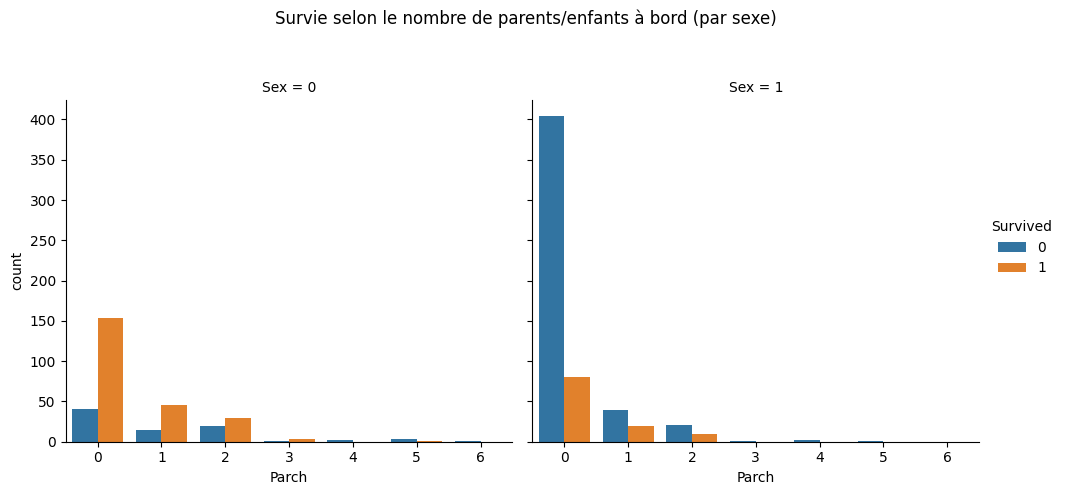

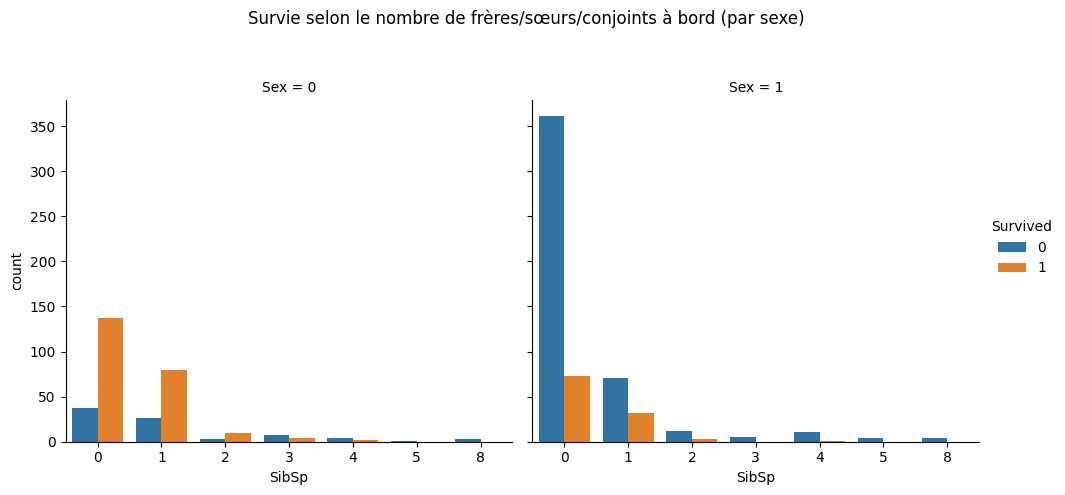

In [846]:
#Répartition selon SibSp dans le total des passagers

sns.countplot(data=train, x="SibSp", hue="SibSp", palette="pink", legend=False
)
plt.title("Répartition des passagers selon le nombre de frères/soeurs/conjoints (SibSp)")
plt.xlabel("Nombre de SibSp")
plt.ylabel("Nombre de passagers")
plt.show()

#Répartition selon SibSp parmi les survivants

sns.countplot( data=train[train['Survived'] == 1], x="SibSp", hue="SibSp", palette="pink", legend=False
)
plt.title("Répartition des survivants selon le nombre de frères/soeurs/conjoints (SibSp)")
plt.xlabel("Nombre de SibSp")
plt.ylabel("Nombre de survivants")
plt.show()

#Répartition selon Parch dans le total des passagers

sns.countplot( data=train, x="Parch", hue="Parch", palette="pink", legend=False
)
plt.title("Répartition des passagers selon le nombre de parents/enfants (Parch)")
plt.xlabel("Nombre de Parch")
plt.ylabel("Nombre de passagers")
plt.show()

#Répartition selon Parch parmi les survivants

sns.countplot(
data=train[train['Survived'] == 1], x="Parch", hue="Parch", palette="pink", legend=False)
plt.title("Répartition des survivants selon le nombre de parents/enfants (Parch)")
plt.xlabel("Nombre de Parch")
plt.ylabel("Nombre de survivants")
plt.show()

#Overview I.

sns.catplot(x="Parch", hue="Survived", col="Sex",
data=train, kind="count")
plt.subplots_adjust(top=0.8)
plt.suptitle("Survie selon le nombre de parents/enfants à bord (par sexe)")
plt.show() 

#Overview II

sns.catplot(x="SibSp", hue="Survived", col="Sex",
data=train, kind="count")
plt.subplots_adjust(top=0.8)
plt.suptitle("Survie selon le nombre de frères/sœurs/conjoints à bord (par sexe)")
plt.show()


Taux de survie par nombre de Parch (tous les passagers):
Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64


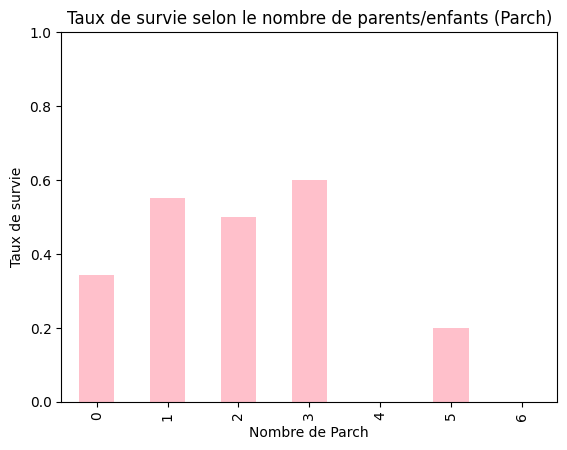

Taux de survie selon SibSp (tous les passagers) :
 SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64


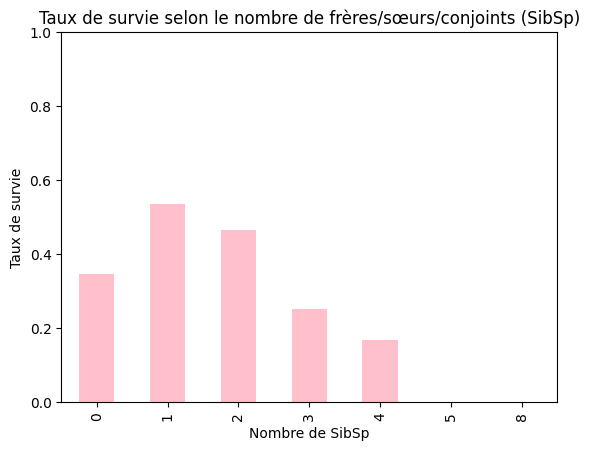

In [847]:
# Calcul du taux de survie par nombre de Parch (tous les passagers)
taux_survie_parch = train.groupby('Parch')['Survived'].mean()

print("Taux de survie par nombre de Parch (tous les passagers):")
print(taux_survie_parch)

#Pour une visualisation graphique :
taux_survie_parch.plot(kind='bar', color='pink')
plt.title("Taux de survie selon le nombre de parents/enfants (Parch)")
plt.xlabel("Nombre de Parch")
plt.ylabel("Taux de survie")
plt.ylim(0,1)
plt.show()


taux_survie_sibsp = train.groupby('SibSp')['Survived'].mean()
print("Taux de survie selon SibSp (tous les passagers) :\n", taux_survie_sibsp)

taux_survie_sibsp.plot(kind='bar', color='pink')
plt.title("Taux de survie selon le nombre de frères/sœurs/conjoints (SibSp)")
plt.xlabel("Nombre de SibSp")
plt.ylabel("Taux de survie")
plt.ylim(0, 1)
plt.show()


In [848]:
# Proportion de survivants selon Parch parmi tous les survivants
proportion_survivants_parch = train[train["Survived"]==1]["Parch"].value_counts(normalize=True).sort_index()
print("Proportion (%) de survivants par Parch (parmi les survivants) :\n", (proportion_survivants_parch*100).round(1))

# Proportion de survivants selon Parch parmi tous les survivants
proportion_survivants_SibSp = train[train["Survived"]==1]["SibSp"].value_counts(normalize=True).sort_index()
print("Proportion (%) de survivants par SibSp (parmi les survivants) :\n", (proportion_survivants_SibSp*100).round(1))

Proportion (%) de survivants par Parch (parmi les survivants) :
 Parch
0    68.1
1    19.0
2    11.7
3     0.9
5     0.3
Name: proportion, dtype: float64
Proportion (%) de survivants par SibSp (parmi les survivants) :
 SibSp
0    61.4
1    32.7
2     3.8
3     1.2
4     0.9
Name: proportion, dtype: float64


SURVIE SELON PORT D'EMBARQUEMENT

-Survie selon le port d'embarquement, par classe de billet

-Survie selon le port d'embarquement, par classe de billet et sexe

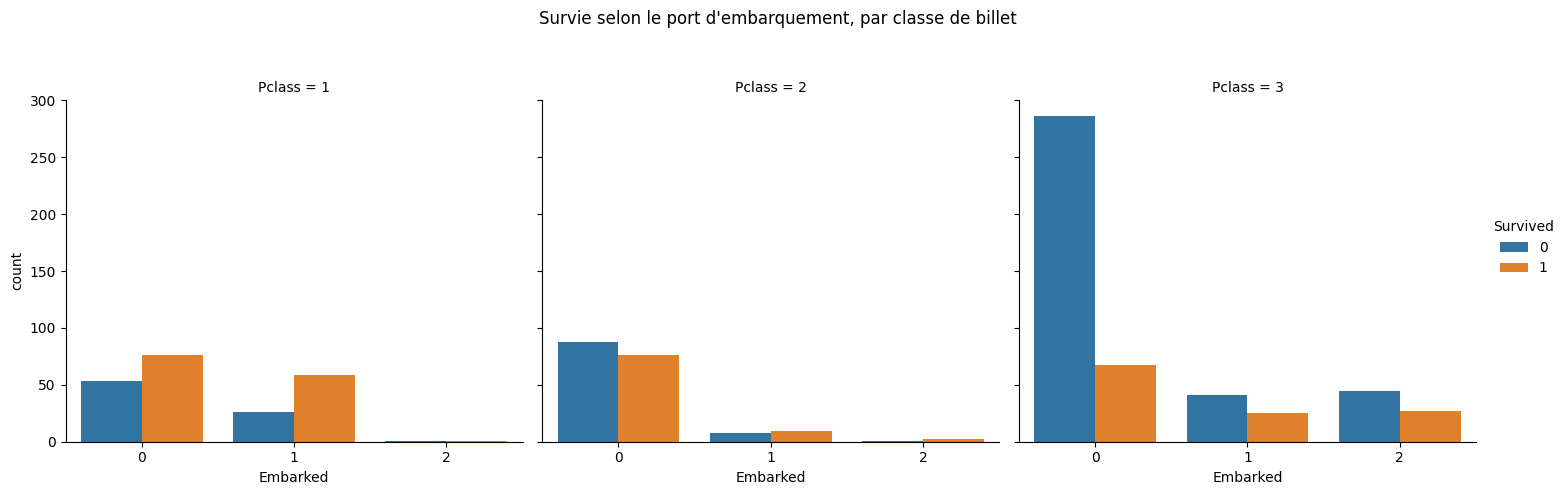

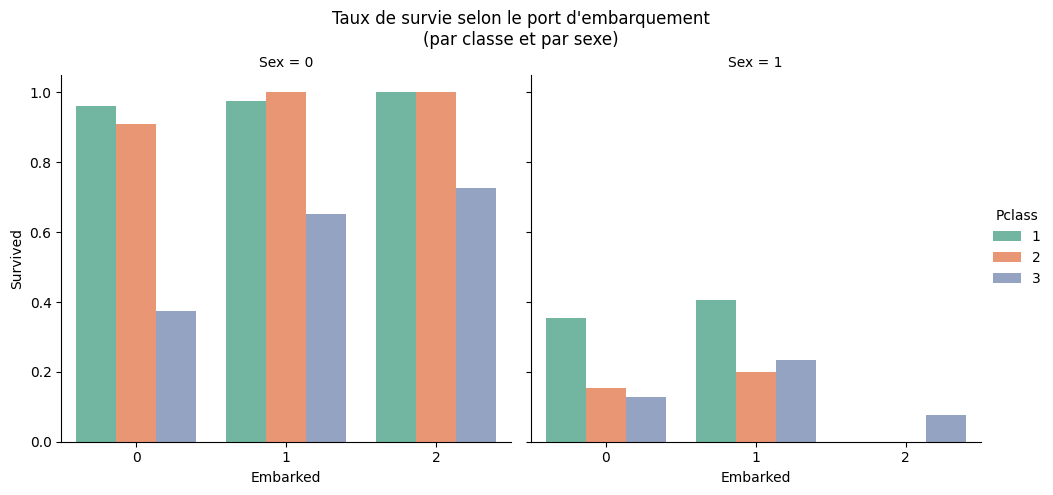

In [849]:
sns.catplot(x="Embarked", hue="Survived", col="Pclass", data=train, kind="count")
plt.subplots_adjust(top=0.8)
plt.suptitle("Survie selon le port d'embarquement, par classe de billet")
plt.show()

sns.catplot(data=train, x='Embarked', y='Survived', hue='Pclass', col='Sex', kind='bar', errorbar=None, palette='Set2')
plt.subplots_adjust(top=0.85)
plt.suptitle("Taux de survie selon le port d'embarquement\n(par classe et par sexe)")
plt.show()


TROUVER DES HYPOTHESES:

ËTRE FEMME
-AVOIR 28
-ËTRE SANS RELATIONS FAMILIALES
-VOYAGER AU PREMIER/DEUXIEME CLASSE 
-FAIRE L'EMBARQUEMENT A CHERBOURG

CATÉGORIES SUPPLÉMENTAIRES

In [850]:
train['Family_size'] = train['SibSp'] + train['Parch'] + 1
train['Is_alone'] = (train['Family_size'] == 1).astype(int)

train = train.drop(columns=['Name', 'Ticket', 'Cabin', 'Fare'], axis=1)


EXPORT TRAIN_CLEAN.CSV

In [851]:
train.to_csv('train_clean.csv', index=False)
train_clean = pd.read_csv('train_clean.csv')

#train_clean.head(15)

In [852]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

from sklearn.svm import LinearSVC
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier 

from sklearn.metrics import accuracy_score


data = pd.read_csv('train_clean.csv')

data = data.drop(['PassengerId'], axis=1)
#data = data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin','Family_size',], axis=1)
#data = data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin','Family_size','Is_alone',], axis=1)

X = data.drop('Survived', axis=1)
print(X.columns)
y = data['Survived'] 
print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

models = {
    'Linear SVC': LinearSVC(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVC': SVC()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.2f}")


Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked', 'Family_size',
       'Is_alone'],
      dtype='object')
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64
Linear SVC Accuracy: 0.80
Random Forest Accuracy: 0.80
KNN Accuracy: 0.80
SVC Accuracy: 0.82


TRAITMENT DES DONNEES TEST.CSV

In [853]:
test = pd.read_csv('test.csv')

print(test.isnull().sum())


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [854]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


Identifier les colonnes avec valeurs manquantes

Remplacer la valeur 'Age' par la mediane 

Remplacer la valeur 'Fare' par la mediane 

Remplacer les NaN d’une colonne par une valeur fixe (Cabin)

In [855]:
test['Age'] = test['Age'].fillna(test['Age'].median())
test['Fare'] = pd.to_numeric(test['Fare'], errors='coerce')
test['Fare'] = test['Fare'].fillna(test['Fare'].median())
test['Cabin'] = test['Cabin'].fillna('Inconnu')

#test.head()


REGARDER LES TYPES DE DONNEES: CONVERTIR SI BESOIN EN VALEUR NUMERIQUE SI LE TYPE EST OBJECT POUR DES COLONNES DE NOMBRE

In [856]:
from sklearn.preprocessing import LabelEncoder

test["Sex"] = test["Sex"].map({"male": 1, "female": 0})
test["Embarked"] = test["Embarked"].map({"S": 0, "C": 1, "Q": 2})

#test.head()

CATÉGORIES SUPPLÉMENTAIRES

In [857]:
test['Family_size'] = test['SibSp'] + test['Parch'] + 1
test['Is_alone'] = (test['Family_size'] == 1).astype(int)

test = test.drop(columns=['Name', 'Ticket', 'Cabin', 'Fare'], axis=1)

EXPORT TEST_CLEAN.CSV

In [858]:
test.to_csv('test_clean.csv', index=False)
test_clean = pd.read_csv('test_clean.csv')

#test_clean.head(20)

In [859]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score



train = pd.read_csv("train_clean.csv")
test = pd.read_csv("test_clean.csv")

X = train.drop(columns=['Survived', 'PassengerId'])
y = train['Survived']

passenger_ids = test['PassengerId']
X_test_final = test.drop(columns=['PassengerId'])

X_test_final = X_test_final[X.columns]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test_final)

models = {
    'LinearSVC': LinearSVC(),
    'RandomForest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVC': SVC()
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_val_pred = model.predict(X_val_scaled)
    accuracy = accuracy_score(y_val, y_val_pred)
    print(f"{name} validation accuracy: {accuracy:.3f}")
    
    y_test_pred = model.predict(X_test_scaled)
    
    submission = pd.DataFrame({
        'PassengerId': passenger_ids,
        'Survived': y_test_pred
    })
    
    submission.to_csv(f"{name}_submission.csv", index=False)
    print(f"Saved: {name}_submission.csv")


LinearSVC validation accuracy: 0.799
Saved: LinearSVC_submission.csv
RandomForest validation accuracy: 0.810
Saved: RandomForest_submission.csv
KNN validation accuracy: 0.799
Saved: KNN_submission.csv
SVC validation accuracy: 0.816
Saved: SVC_submission.csv
